In [1]:
! nvidia-smi

Sun Jun 14 06:51:25 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### get darknet

In [2]:
! git clone https://github.com/pjreddie/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 5907, done.
remote: Total 5907 (delta 0), reused 0 (delta 0), pack-reused 5907
Receiving objects: 100% (5907/5907), 6.32 MiB | 8.74 MiB/s, done.
Resolving deltas: 100% (3923/3923), done.


In [3]:
! cd darknet; head Makefile

GPU=0
CUDNN=0
OPENCV=0
OPENMP=0
DEBUG=0

ARCH= -gencode arch=compute_30,code=sm_30 \
      -gencode arch=compute_35,code=sm_35 \
      -gencode arch=compute_50,code=[sm_50,compute_50] \
      -gencode arch=compute_52,code=[sm_52,compute_52]


### set gpu, cudnn, opencv to 1

In [0]:
"""
$ sed -i ‘s/abc/xyz/g’ filename.txt 
replace abc to xyz
"""
!sed -i "s/GPU=0/GPU=1/g" darknet/Makefile
!sed -i "s/CUDNN=0/CUDNN=1/g" darknet/Makefile
!sed -i "s/OPENCV=0/OPENCV=1/g" darknet/Makefile

In [5]:
! head darknet/Makefile

GPU=1
CUDNN=1
OPENCV=1
OPENMP=0
DEBUG=0

ARCH= -gencode arch=compute_30,code=sm_30 \
      -gencode arch=compute_35,code=sm_35 \
      -gencode arch=compute_50,code=[sm_50,compute_50] \
      -gencode arch=compute_52,code=[sm_52,compute_52]


### change detector.c every 100 get weight

In [0]:
# upload detector.c and replace
# first,delete detector.c
# and connect drive 
! cp "/content/drive/My Drive/Colab Notebooks/DL_Final_pro/cfg_mask/detector.c" darknet/examples/detector.c

### compile YOLO 'make'

In [10]:
! cd darknet; make

mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -DOPENCV `pkg-config --cflags opencv`  -DGPU -I/usr/local/cuda/include/ -DCUDNN  -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -c ./src/gemm.c -o obj/gemm.o
./src/gemm.c: In function ‘time_gpu’:
./src/gemm.c:232:9: warning: ‘cudaThreadSynchronize’ is deprecated [-Wdeprecated-declarations]
         cudaThreadSynchronize();
         ^~~~~~~~~~~~~~~~~~~~~
In file included from /usr/local/cuda/include/cuda_runtime.h:96:0,
                 from include/darknet.h:11,
                 from ./src/utils.h:5,
                 from ./src/gemm.c:2:
/usr/local/cuda/include/cuda_runtime_api.h:957:57: note: declared here
 extern __CUDA_DEPRECATED __host__ cudaError_t CUDARTAPI cudaThreadSynchronize(void);
                                                         ^~~~~~~~~~~~~~~~~~~~~
gcc -Iinclude/ -Isrc/ -DOPENCV `pkg-config --cflags opencv`  -DGPU -I/usr/local/cuda/include/ -DCUDNN 

### Test

In [0]:
! cd darknet ; ./darknet #call darknet

usage: ./darknet <function>


In [0]:
!wget https://pjreddie.com/media/files/yolov3-tiny.weights #get weight file

--2020-06-02 10:02:21--  https://pjreddie.com/media/files/yolov3-tiny.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35434956 (34M) [application/octet-stream]
Saving to: ‘yolov3-tiny.weights’

yolov3-tiny.weights 100%[===================>]  33.79M  50.1KB/s    in 9m 6s   

2020-06-02 10:11:29 (63.4 KB/s) - ‘yolov3-tiny.weights’ saved [35434956/35434956]



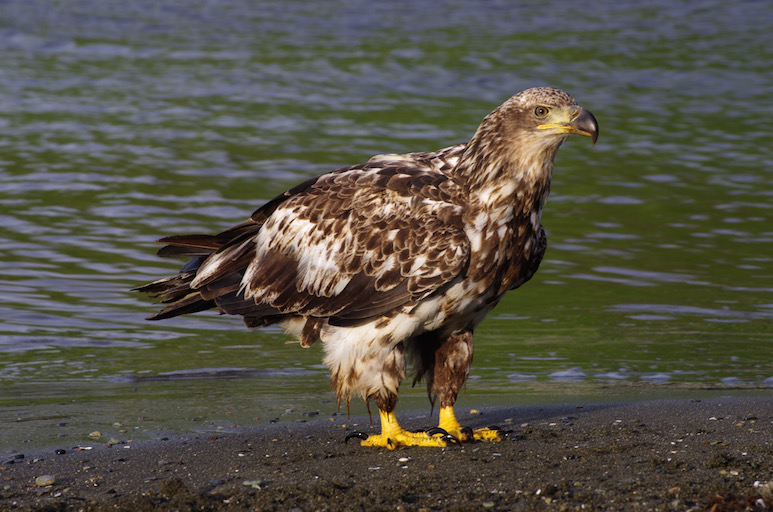

In [0]:
from PIL import Image
Image.open('darknet/data/eagle.jpg')

In [0]:
! cd darknet; ./darknet detect cfg/yolov3-tiny.cfg ../yolov3-tiny.weights data/eagle.jpg
#      to darknet       detect  1.use yolov3-tiny parameter 2.yolov3-tiny weights 3.predict file

layer     filters    size              input                output
    0 conv     16  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  16  0.150 BFLOPs
    1 max          2 x 2 / 2   416 x 416 x  16   ->   208 x 208 x  16
    2 conv     32  3 x 3 / 1   208 x 208 x  16   ->   208 x 208 x  32  0.399 BFLOPs
    3 max          2 x 2 / 2   208 x 208 x  32   ->   104 x 104 x  32
    4 conv     64  3 x 3 / 1   104 x 104 x  32   ->   104 x 104 x  64  0.399 BFLOPs
    5 max          2 x 2 / 2   104 x 104 x  64   ->    52 x  52 x  64
    6 conv    128  3 x 3 / 1    52 x  52 x  64   ->    52 x  52 x 128  0.399 BFLOPs
    7 max          2 x 2 / 2    52 x  52 x 128   ->    26 x  26 x 128
    8 conv    256  3 x 3 / 1    26 x  26 x 128   ->    26 x  26 x 256  0.399 BFLOPs
    9 max          2 x 2 / 2    26 x  26 x 256   ->    13 x  13 x 256
   10 conv    512  3 x 3 / 1    13 x  13 x 256   ->    13 x  13 x 512  0.399 BFLOPs
   11 max          2 x 2 / 1    13 x  13 x 512   ->    13 x  13 x 512
   12 con

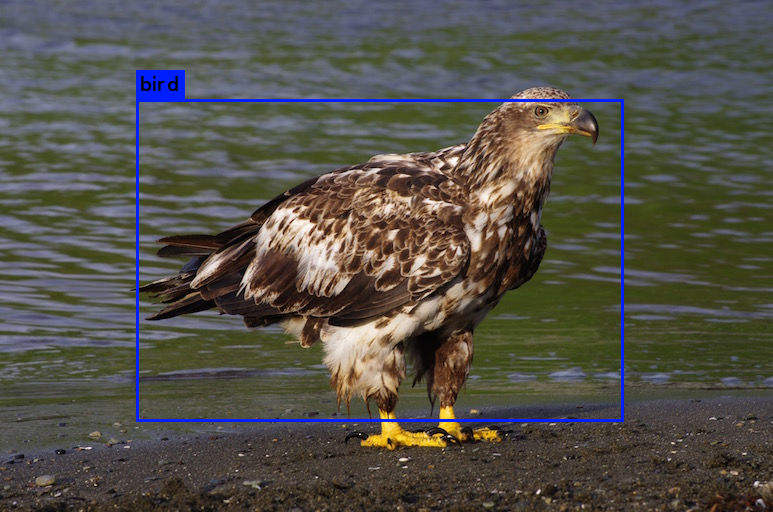

In [0]:
from PIL import Image
Image.open('darknet/predictions.jpg')#predict outcome picture

### download and check dataset 
source https://www.kaggle.com/vtech6/medical-masks-dataset/data

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
! cp "/content/drive/My Drive/Colab Notebooks/DL_Final_pro/medical-masks-dataset.zip" /content/

In [0]:
! unzip /content/medical-masks-dataset.zip > data_unzip.log

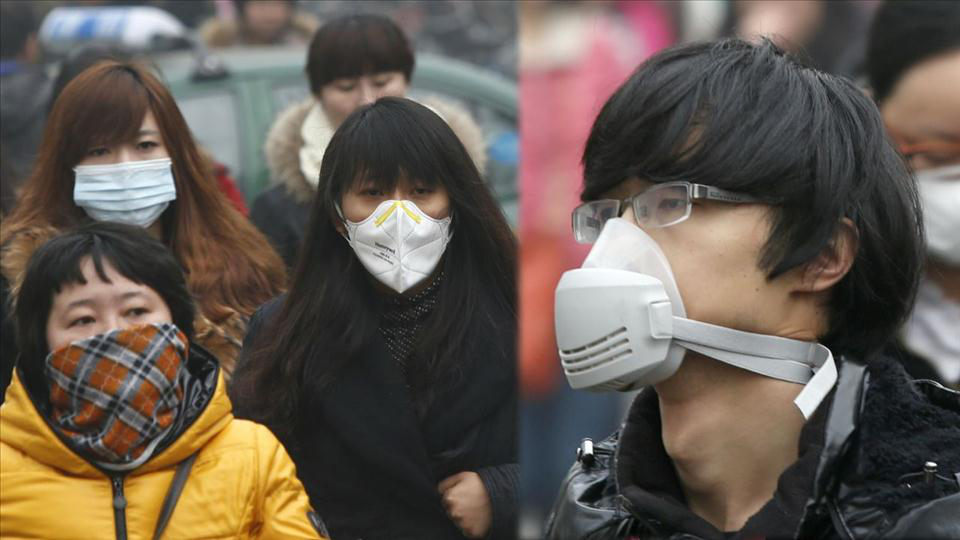

In [13]:
from PIL import Image
img = Image.open('/content/images/022814asiatodaymasks_960x540.jpg')
img

In [14]:
! cat /content/labels/022814asiatodaymasks_960x540.xml

<annotation>
	<folder>images</folder>
	<filename>022814asiatodaymasks_960x540.jpg</filename>
	<path>P:\mask_mouth\images\022814asiatodaymasks_960x540.jpg</path>
	<source>
		<database>Unknown</database>
	</source>
	<size>
		<width>960</width>
		<height>540</height>
		<depth>3</depth>
	</size>
	<segmented>0</segmented>
	<object>
		<name>bad</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>319</xmin>
			<ymin>69</ymin>
			<xmax>413</xmax>
			<ymax>133</ymax>
		</bndbox>
	</object>
	<object>
		<name>good</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>70</xmin>
			<ymin>124</ymin>
			<xmax>176</xmax>
			<ymax>224</ymax>
		</bndbox>
	</object>
	<object>
		<name>good</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>42</xmin>
			<ymin>285</ymin>
			<xmax>198</xmax>
			<ymax>458</ymax>
		</bndbox>
	</object>
	<object>


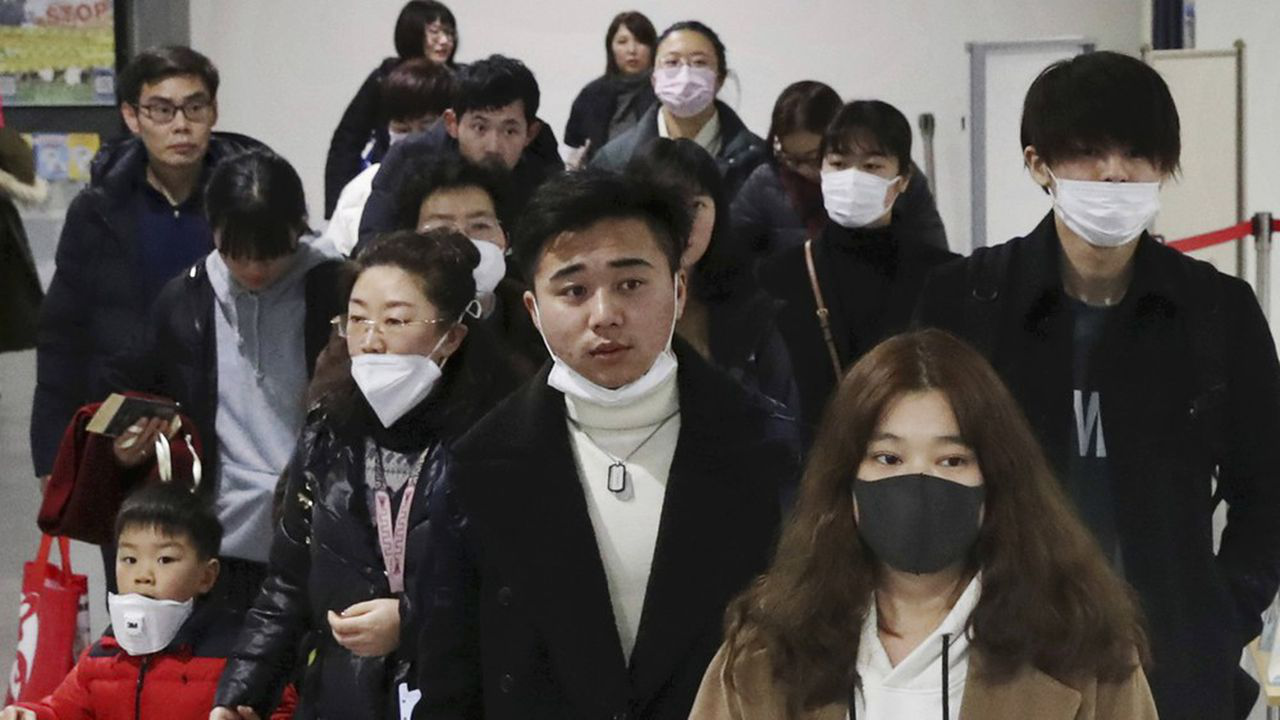

In [15]:
from PIL import Image
img = Image.open('/content/images/0602623232127-web-tete.jpg')
img

In [16]:
! cat /content/labels/0602623232127-web-tete.xml

<annotation>
	<folder>images</folder>
	<filename>0602623232127-web-tete.jpg</filename>
	<path>P:\mask_mouth\images\0602623232127-web-tete.jpg</path>
	<source>
		<database>Unknown</database>
	</source>
	<size>
		<width>1280</width>
		<height>720</height>
		<depth>3</depth>
	</size>
	<segmented>0</segmented>
	<object>
		<name>bad</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>134</xmin>
			<ymin>84</ymin>
			<xmax>220</xmax>
			<ymax>166</ymax>
		</bndbox>
	</object>
	<object>
		<name>bad</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>420</xmin>
			<ymin>16</ymin>
			<xmax>460</xmax>
			<ymax>63</ymax>
		</bndbox>
	</object>
	<object>
		<name>bad</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>610</xmin>
			<ymin>26</ymin>
			<xmax>656</xmax>
			<ymax>77</ymax>
		</bndbox>
	</object>
	<object>
		<name>good</n

In [0]:
# make yolofile
! rm -rf /content/yolo
! mkdir /content/yolo

In [0]:
#get xml info
from bs4 import BeautifulSoup
import os
import shutil

status_dic = {'good': 2, 'bad': 1, 'none': 0}
def getYoloFormat(filename,label_path, img_path, yolo_path, newname):
    with open(label_path+ filename, 'r') as f:
        soup = BeautifulSoup(f.read(), 'xml')
        #filename
        imgname = soup.select_one('filename').text
        #picture_width
        image_w = int(soup.select_one('width').text)
        #picture_height
        image_h = int(soup.select_one('height').text)
        ary = []
        #get into every object
        for obj in soup.select('object'):
            #xyminmax
            xmin = int(obj.select_one('xmin').text)
            xmax = int(obj.select_one('xmax').text)
            ymin = int(obj.select_one('ymin').text)
            ymax = int(obj.select_one('ymax').text)
            #change by status_dic
            objclass = status_dic.get(obj.select_one('name').text)
            #yolo format (refer:https://reurl.cc/8GLbRM)
            x = (xmin + (xmax-xmin)/2) * 1.0 / image_w
            y = (ymin + (ymax-ymin)/2) * 1.0 / image_h
            w = (xmax-xmin) * 1.0 / image_w
            h = (ymax-ymin) * 1.0 / image_h
            ary.append(' '.join([str(objclass), str(x),str(y),str(w),str(h)]))
        #write yolo file
        if os.path.exists(img_path + imgname):
            shutil.copyfile(img_path + imgname, yolo_path + newname + '.jpg')
            with open(yolo_path + newname + '.txt', 'w') as f:
                f.write('\n'.join(ary))

In [19]:
import os
# path
labelpath = '/content/labels/'
imgpath   = '/content/images/'
yolopath  = '/content/yolo/'
ary = []
#make yolo file
for idx, f in enumerate(os.listdir(labelpath)):
    try:
        getYoloFormat(f, labelpath,imgpath, yolopath, str(idx))
    except Exception as e:
        print(e)

float division by zero


In [20]:
#test
! cat /content/yolo/0.txt

2 0.169375 0.2725 0.13125 0.18833333333333332
2 0.53 0.2525 0.12 0.19833333333333333
2 0.70375 0.3625 0.105 0.13833333333333334
2 0.959375 0.4375 0.08125 0.12833333333333333

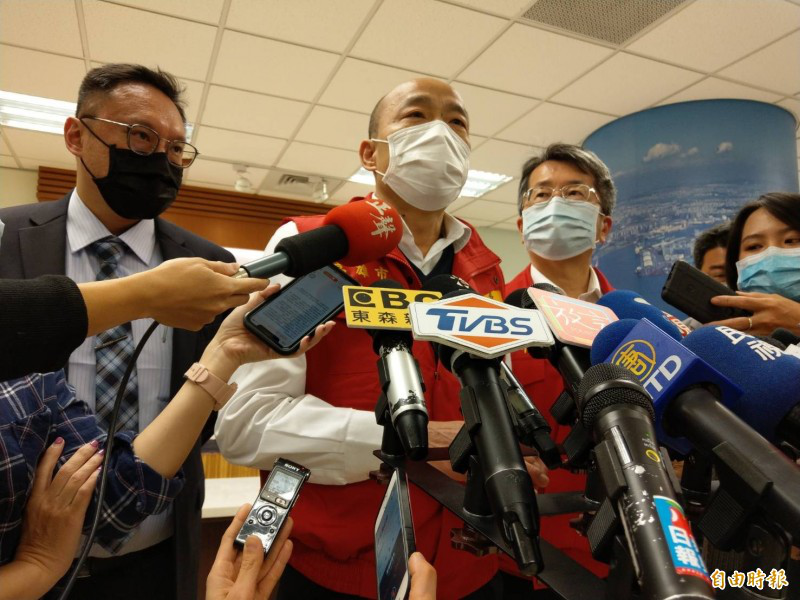

In [21]:
from PIL import Image
Image.open('/content/yolo/0.jpg')

### prepare train and test set

In [0]:
# make file
! rm -rf /content/cfg_mask
! mkdir /content/cfg_mask

In [24]:
# open and count 0.85
import os
datasets = ['/content/yolo/'+ f for f in os.listdir('/content/yolo/') if not f.endswith('.txt')]
len(datasets) * 0.85

575.4499999999999

In [0]:
# 8.5:1.5 575
with open('/content/cfg_mask/train.txt', 'w') as f:
    f.write('\n'.join(datasets[0:575]))

with open('/content/cfg_mask/test.txt', 'w') as f:
    f.write('\n'.join(datasets[575:]))

### get parameter file

In [0]:
! cp "/content/drive/My Drive/Colab Notebooks/DL_Final_pro/cfg_mask/obj.data" cfg_mask/
! cp "/content/drive/My Drive/Colab Notebooks/DL_Final_pro/cfg_mask/obj.names" cfg_mask/

In [27]:
! head /content/cfg_mask/obj.data

classes= 3
train  = /content/cfg_mask/train.txt
valid  = /content/cfg_mask/test.txt
names  = /content/cfg_mask/obj.names
backup = /content/cfg_mask/weights/

In [28]:
! head /content/cfg_mask/obj.names

none
bad
good


### make weights file

In [0]:
! mkdir /content/cfg_mask/weights

### YOLOV3

In [0]:
%%html
<img src='https://miro.medium.com/max/2000/1*d4Eg17IVJ0L41e7CTWLLSg.png' width="800px" />

In [0]:
%%html
<img src='https://miro.medium.com/max/1200/0*3A8U0Hm5IKmRa6hu.png' width="500px" />

### change yolov3-tiny.cfg

In [0]:
# YOLOV3 filter : 4(BOX xywh) + 1(score) + 3(class:none good bad)
# B number of Bounding Box each Feature Map can detect:3(yolov3)
#filters=(3 + 5)*3 = 24

In [0]:
# use yolov3.cfg
! cp "/content/drive/My Drive/Colab Notebooks/DL_Final_pro/cfg_mask/yolov3.cfg" cfg_mask/

In [0]:
# get yolov3-tiny.cfg to cfg_mask/
! cp /content/darknet/cfg/yolov3-tiny.cfg /content/cfg_mask/ 

In [0]:
# row 127 135 171 177
! sed -n -e 127p -e 135p -e 171p -e 177p /content/cfg_mask/yolov3-tiny.cfg 

filters=24
classes=3
filters=24
classes=3


In [0]:
# change 255,80 to 24 3
! sed -i '127s/255/24/' /content/cfg_mask/yolov3-tiny.cfg
! sed -i '135s/80/3/' /content/cfg_mask/yolov3-tiny.cfg
! sed -i '171s/255/24/' /content/cfg_mask/yolov3-tiny.cfg
! sed -i '177s/80/3/' /content/cfg_mask/yolov3-tiny.cfg
! sed -n -e 127p -e 135p -e 171p -e 177p /content/cfg_mask/yolov3-tiny.cfg

filters=24
classes=3
filters=24
classes=3


### darknet53

In [0]:
! cp "/content/drive/My Drive/Colab Notebooks/DL_Final_pro/darknet53.conv.74" /content/cfg_mask/

### train

In [32]:
! darknet/darknet detector train /content/cfg_mask/obj.data /content/cfg_mask/yolov3.cfg /content/cfg_mask/darknet53.conv.74 

Streaming output truncated to the last 5000 lines.
Region 82 Avg IOU: 0.705018, Class: 0.999936, Obj: 0.648994, No Obj: 0.000229, .5R: 1.000000, .75R: 0.000000,  count: 1
Region 94 Avg IOU: 0.767401, Class: 0.978809, Obj: 0.645794, No Obj: 0.000968, .5R: 0.900000, .75R: 0.700000,  count: 10
Region 106 Avg IOU: 0.655377, Class: 0.917203, Obj: 0.774249, No Obj: 0.002689, .5R: 0.844444, .75R: 0.277778,  count: 90
Region 82 Avg IOU: 0.915659, Class: 0.976220, Obj: 0.947257, No Obj: 0.000541, .5R: 1.000000, .75R: 1.000000,  count: 1
Region 94 Avg IOU: 0.697941, Class: 0.990872, Obj: 0.469720, No Obj: 0.000384, .5R: 0.666667, .75R: 0.666667,  count: 3
Region 106 Avg IOU: 0.752977, Class: 0.972074, Obj: 0.750272, No Obj: 0.000500, .5R: 0.941176, .75R: 0.588235,  count: 17
Region 82 Avg IOU: 0.618442, Class: 0.972623, Obj: 0.653722, No Obj: 0.000919, .5R: 1.000000, .75R: 0.333333,  count: 3
Region 94 Avg IOU: -nan, Class: -nan, Obj: -nan, No Obj: 0.000093, .5R: -nan, .75R: -nan,  count: 0
Regi

### test

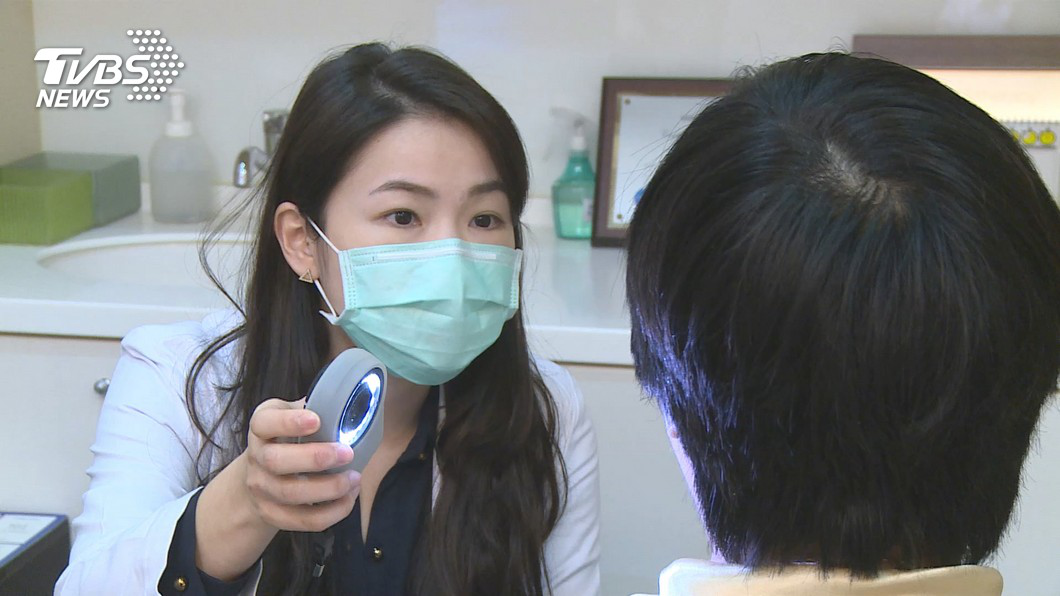

In [33]:
from PIL import Image
Image.open('yolo/648.jpg')

In [0]:
! cp "/content/drive/My Drive/Colab Notebooks/DL_Final_pro/weights/yolov3_1200.weights" /content/cfg_mask/ #-tiny_200000

In [35]:
! cd darknet; ./darknet detector test /content/cfg_mask/obj.data  /content/cfg_mask/yolov3.cfg /content/cfg_mask/yolov3_1200.weights /content/yolo/648.jpg

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

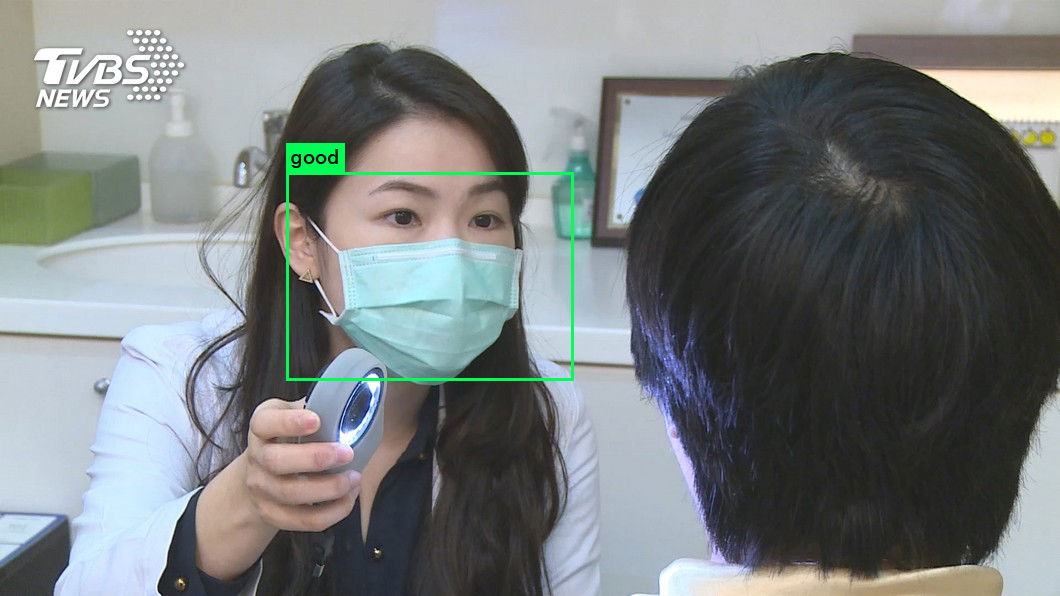

In [36]:
from PIL import Image
Image.open('/content/darknet/predictions.jpg')

### other test

In [0]:
! cp "/content/drive/My Drive/Colab Notebooks/DL_Final_pro/test_2.jpg" /content/

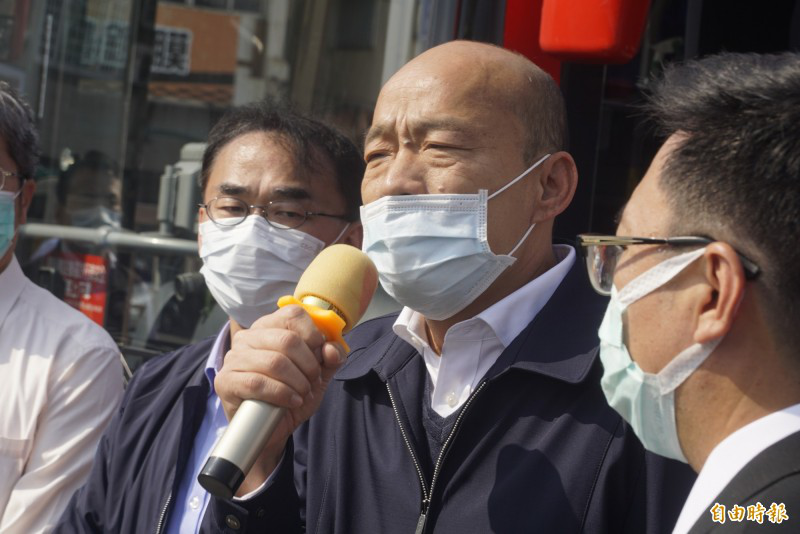

In [38]:
from PIL import Image
Image.open('/content/test_2.jpg')

In [39]:
! cd darknet; ./darknet detector test /content/cfg_mask/obj.data  /content/cfg_mask/yolov3.cfg /content/cfg_mask/yolov3_1200.weights /content/test_2.jpg

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

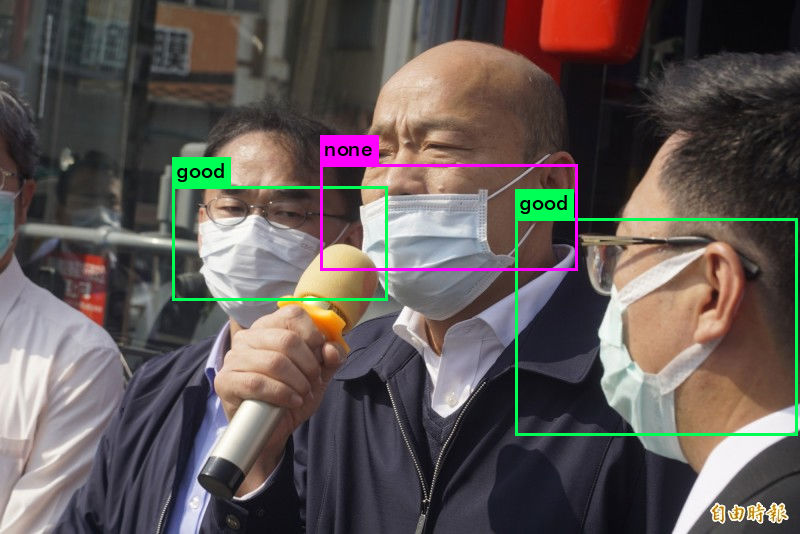

In [40]:
from PIL import Image
Image.open('/content/darknet/predictions.jpg')